# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os  

 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities[0]

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
city_num=[]
city_name=[]
lats=[]
longs=[]
temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]

city_number = 0
for city in cities:
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        units = "imperial"
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_number = city_number + 1
        print(city, city_number)
        lats.append(weather_json["coord"]["lat"])
        longs.append(weather_json["coord"]["lon"])
        temp.append(weather_json["main"]["temp"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        city_num.append(city_number)
        city_name.append(city)
    except:
        print("skipped")


barrow 1
talnakh 2
new norfolk 3
wanning 4
bredasdorp 5
illoqqortoormiut 6
skipped
rikitea 7
constitucion 8
lebu 9
belushya guba 10
skipped
souillac 11
dzaoudzi 12
busselton 13
emerald 14
tiksi 15
hermanus 16
butaritari 17
castro 18
mataura 19
anderson 20
bousse 21
jamestown 22
fortuna 23
tobol 24
opuwo 25
cockburn town 26
aksarka 27
praia da vitoria 28
kulhudhuffushi 29
arnes 30
hobart 31
keetmanshoop 32
kuvandyk 33
leningradskiy 34
sitka 35
tabiauea 36
skipped
bluff 37
nome 38
saldanha 39
nikolskoye 40
sao gabriel da cachoeira 41
port-de-paix 42
skipped
dutlwe 43
kilifi 44
vaini 45
ushuaia 46
punta arenas 47
beckley 48
kapaa 49
altay 50
alofi 51
laguna 52
canton 53
monrovia 54
kongolo 55
ponta do sol 56
atuona 57
barentsburg 58
skipped
tuktoyaktuk 59
coquimbo 60
puerto ayora 61
port alfred 62
revelstoke 63
pevek 64
astana 65
joao pinheiro 66
hambantota 67
mabaruma 68
saint george 69
victoria 70
lata 71
airai 72
salalah 73
vila velha 74
mehamn 75
albany 76
vadakku valliyur 77
yate 78


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# city="mys shmidta"
# query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# weather_json

In [ ]:
# city="ilulissat"
# query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# weather_json

In [26]:
weather_dict={"City ID":city_num,"City Name":city_name,"Latitude":lats, "Longitude":longs, "Temperature(F)":temp,
                       "Humidity (%)":humidity,"Cloudiness":cloudiness, "Wind Speed (MPH)":wind_speed}
# len(city_num)
# len(city_name)
# len(temp)
weather_df=pd.DataFrame(weather_dict)
os.makedirs('output', exist_ok=True) 
weather_df.to_csv('output/cities.csv')
weather_df

,City ID,City Name,Latitude,Longitude,Temperature(F),Humidity (%),Cloudiness,Wind Speed (MPH)
0,1,barrow,71.2906,-156.7887,17.62,73,20,10.36
1,2,talnakh,69.4865,88.3972,-2.79,99,89,4.94
2,3,new norfolk,-42.7826,147.0587,52.77,83,84,1.72
3,4,wanning,18.8003,110.3967,82.00,84,15,12.84
4,5,bredasdorp,-34.5322,20.0403,56.53,75,73,5.10
...,...,...,...,...,...,...,...,...
544,586,billings,45.7833,-108.5007,52.95,36,75,7.00
545,588,waddan,29.1614,16.1390,65.77,39,25,7.58
546,589,novyy urengoy,66.0833,76.6333,6.37,97,98,5.32
547,590,tres lagoas,-20.7511,-51.6783,76.66,53,29,8.10


In [23]:
humid_cities=weather_df.loc[weather_df["Humidity (%)"]>100]
humid_cities


,City ID,City Name,Latitude,Longitude,Temperature(F),Humidity (%),Cloudiness,Wind Speed (MPH)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

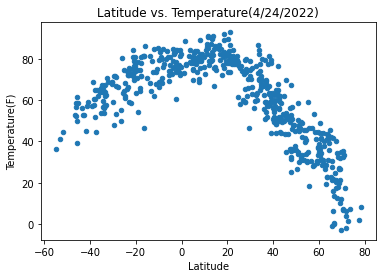

In [75]:
x=weather_df["Latitude"]
y=weather_df["Temperature(F)"]
# plt.scatter(x,y)
# plt.title="Latitude vs. Temperature"
# plt.xlabel="Latitude"
# plt.ylabel="Temperature(F)"
# plt.show()
fig1=weather_df.plot.scatter(x="Latitude",y="Temperature(F)",title="Latitude vs. Temperature(4/24/2022)")
plt.savefig('output/fig1.png', dpi=300)


In [76]:
print("This plot shows decreasing temperature as cities get farther from the equator")

This plot shows decreasing temperature as cities get farther from the equator


## Latitude vs. Humidity Plot

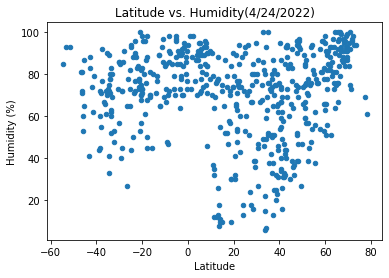

In [77]:
fig2=weather_df.plot.scatter(x="Latitude",y="Humidity (%)",title="Latitude vs. Humidity(4/24/2022)")
plt.savefig('output/fig2.png', dpi=300)

In [78]:
print("This plot shows humidity levels as cities get farther from the equator, with the driest cities being just north of the equator")

This plot shows humidity levels as cities get farther from the equator, with the driest cities being just north of the equator


## Latitude vs. Cloudiness Plot

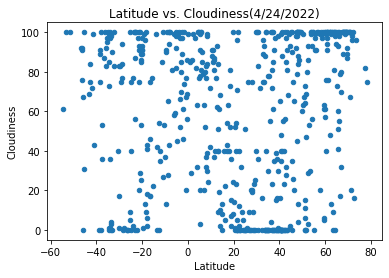

In [79]:
fig3=weather_df.plot.scatter(x="Latitude",y="Cloudiness",title="Latitude vs. Cloudiness(4/24/2022)")
plt.savefig('output/fig3.png', dpi=300)

In [80]:
print("This plot shows cloudiness as cities get farther from the equator")

This plot shows cloudiness as cities get farther from the equator


## Latitude vs. Wind Speed Plot

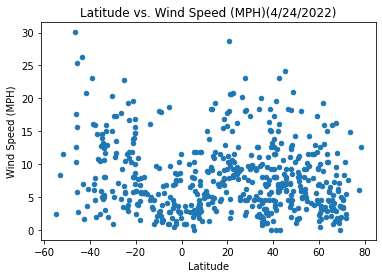

In [81]:
fig4=weather_df.plot.scatter(x="Latitude",y="Wind Speed (MPH)",title="Latitude vs. Wind Speed (MPH)(4/24/2022)")
plt.savefig('output/fig4.png', dpi=300)

In [82]:
print("This plot shows wind speed as cities get farther from the equator")

This plot shows wind speed as cities get farther from the equator


## Linear Regression

In [83]:
NHemi=weather_df.loc[weather_df["Latitude"]>0]
NHemi

,City ID,City Name,Latitude,Longitude,Temperature(F),Humidity (%),Cloudiness,Wind Speed (MPH)
0,1,barrow,71.2906,-156.7887,17.62,73,20,10.36
1,2,talnakh,69.4865,88.3972,-2.79,99,89,4.94
3,4,wanning,18.8003,110.3967,82.00,84,15,12.84
12,15,tiksi,71.6872,128.8694,4.12,96,98,2.42
14,17,butaritari,3.0707,172.7902,81.30,77,97,9.98
...,...,...,...,...,...,...,...,...
543,585,winnemucca,40.9730,-117.7357,62.65,16,0,3.44
544,586,billings,45.7833,-108.5007,52.95,36,75,7.00
545,588,waddan,29.1614,16.1390,65.77,39,25,7.58
546,589,novyy urengoy,66.0833,76.6333,6.37,97,98,5.32


In [84]:
SHemi=weather_df.loc[weather_df["Latitude"]<0]
SHemi

,City ID,City Name,Latitude,Longitude,Temperature(F),Humidity (%),Cloudiness,Wind Speed (MPH)
2,3,new norfolk,-42.7826,147.0587,52.77,83,84,1.72
4,5,bredasdorp,-34.5322,20.0403,56.53,75,73,5.10
5,7,rikitea,-23.1203,-134.9692,72.97,89,100,16.73
6,8,constitucion,-35.3333,-72.4167,53.55,90,97,5.91
7,9,lebu,-37.6167,-73.6500,51.69,77,36,7.92
...,...,...,...,...,...,...,...,...
525,566,kruisfontein,-34.0033,24.7314,53.89,78,100,5.32
528,570,fare,-16.7000,-151.0167,81.39,70,46,5.68
529,571,neuquen,-38.9516,-68.0591,57.09,44,0,23.02
540,582,palmeira das missoes,-27.8994,-53.3136,66.43,91,1,7.18


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

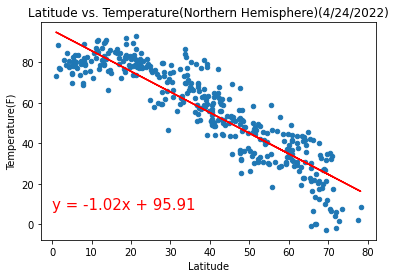

In [85]:
x=NHemi["Latitude"]
y=NHemi["Temperature(F)"]

fig5=NHemi.plot.scatter(x="Latitude",y="Temperature(F)",title="Latitude vs. Temperature(Northern Hemisphere)(4/24/2022)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")
plt.savefig('output/fig5.png', dpi=300)

In [86]:
print("This shows a decreasing temperature the farther from the Equator the city is")

This shows a decreasing temperature the farther from the Equator the city is


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

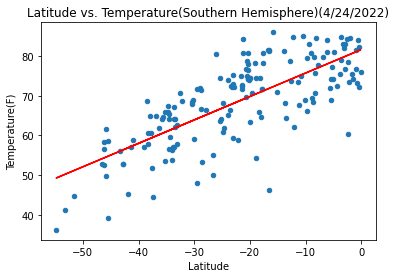

In [87]:
x=SHemi["Latitude"]
y=SHemi["Temperature(F)"]

fig6=SHemi.plot.scatter(x="Latitude",y="Temperature(F)",title="Latitude vs. Temperature(Southern Hemisphere)(4/24/2022)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")
plt.savefig('output/fig6.png', dpi=300)

In [88]:
print("This shows a decreasing temperature the farther from the Equator the city is")

This shows a decreasing temperature the farther from the Equator the city is


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

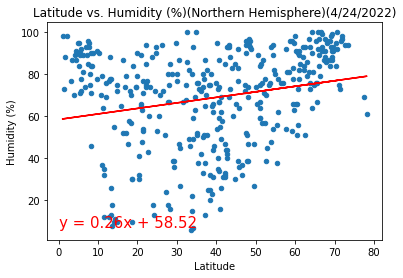

In [89]:
x=NHemi["Latitude"]
y=NHemi["Humidity (%)"]

fig7=NHemi.plot.scatter(x="Latitude",y="Humidity (%)",title="Latitude vs. Humidity (%)(Northern Hemisphere)(4/24/2022)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")
plt.savefig('output/fig7.png', dpi=300)

In [90]:
print("This shows very little correlation between latitude and humidity")

This shows very little correlation between latitude and humidity


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

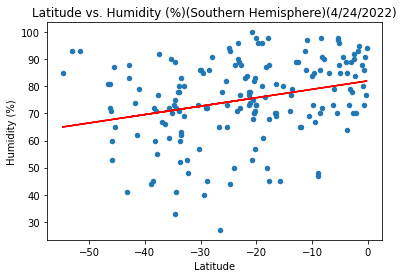

In [91]:
x=SHemi["Latitude"]
y=SHemi["Humidity (%)"]

fig8=SHemi.plot.scatter(x="Latitude",y="Humidity (%)",title="Latitude vs. Humidity (%)(Southern Hemisphere)(4/24/2022)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")
plt.savefig('output/fig8.png', dpi=300)

In [92]:
print("This shows very little correlation between latitude and humidity")

This shows very little correlation between latitude and humidity


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

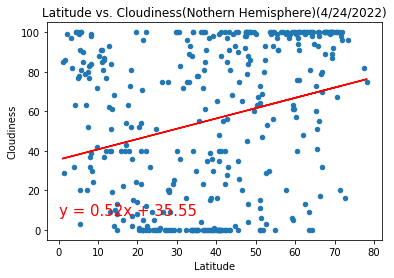

In [93]:
x=NHemi["Latitude"]
y=NHemi["Cloudiness"]

fig9=NHemi.plot.scatter(x="Latitude",y="Cloudiness",title="Latitude vs. Cloudiness(Nothern Hemisphere)(4/24/2022)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")
plt.savefig('output/fig9.png', dpi=300)

In [94]:
print("This shows a small correlation between latitude and cloudiness")

This shows a small correlation between latitude and cloudiness


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

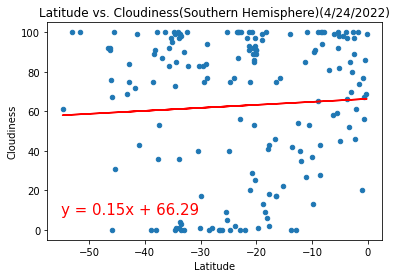

In [95]:
x=SHemi["Latitude"]
y=SHemi["Cloudiness"]

fig10=SHemi.plot.scatter(x="Latitude",y="Cloudiness",title="Latitude vs. Cloudiness(Southern Hemisphere)(4/24/2022)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,8),fontsize=15,color="red")
plt.savefig('output/fig10.png', dpi=300)

In [96]:
print("This shows very little correlation between latitude and cloudiness")

This shows very little correlation between latitude and cloudiness


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

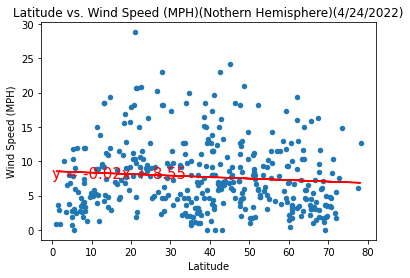

In [97]:
x=NHemi["Latitude"]
y=NHemi["Wind Speed (MPH)"]

fig11=NHemi.plot.scatter(x="Latitude",y="Wind Speed (MPH)",title="Latitude vs. Wind Speed (MPH)(Nothern Hemisphere)(4/24/2022)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")
plt.savefig('output/fig11.png', dpi=300)

In [98]:
print("This shows very little correlation between latitude and Wind Speed (MPH)")

This shows very little correlation between latitude and Wind Speed (MPH)


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

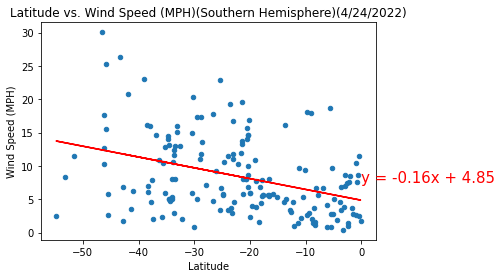

In [99]:
x=SHemi["Latitude"]
y=SHemi["Wind Speed (MPH)"]

fig12=SHemi.plot.scatter(x="Latitude",y="Wind Speed (MPH)",title="Latitude vs. Wind Speed (MPH)(Southern Hemisphere)(4/24/2022)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")
plt.savefig('output/fig12.png', dpi=300)

In [100]:
print("This shows very little correlation between latitude and Wind Speed (MPH)")

This shows very little correlation between latitude and Wind Speed (MPH)
